# DỰ ĐOÁN GIÁ BẤT ĐỘNG SẢN SỬ DỤNG MACHINE LEARNING

In [1]:
# IMPORTING LIBRARIES FOR ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SUPRESSING USERWARNINGS
import warnings
warnings.simplefilter("ignore", category = UserWarning)

## Phân tích sơ bộ (EDA - Exploratory Data Analysis)

In [2]:
# DATASET IMPORTATION
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# NUMBER OF ROWS AND COLUMNS
df.shape

(545, 13)

In [4]:
# DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# DATASET DESCRIPTION
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Visualization

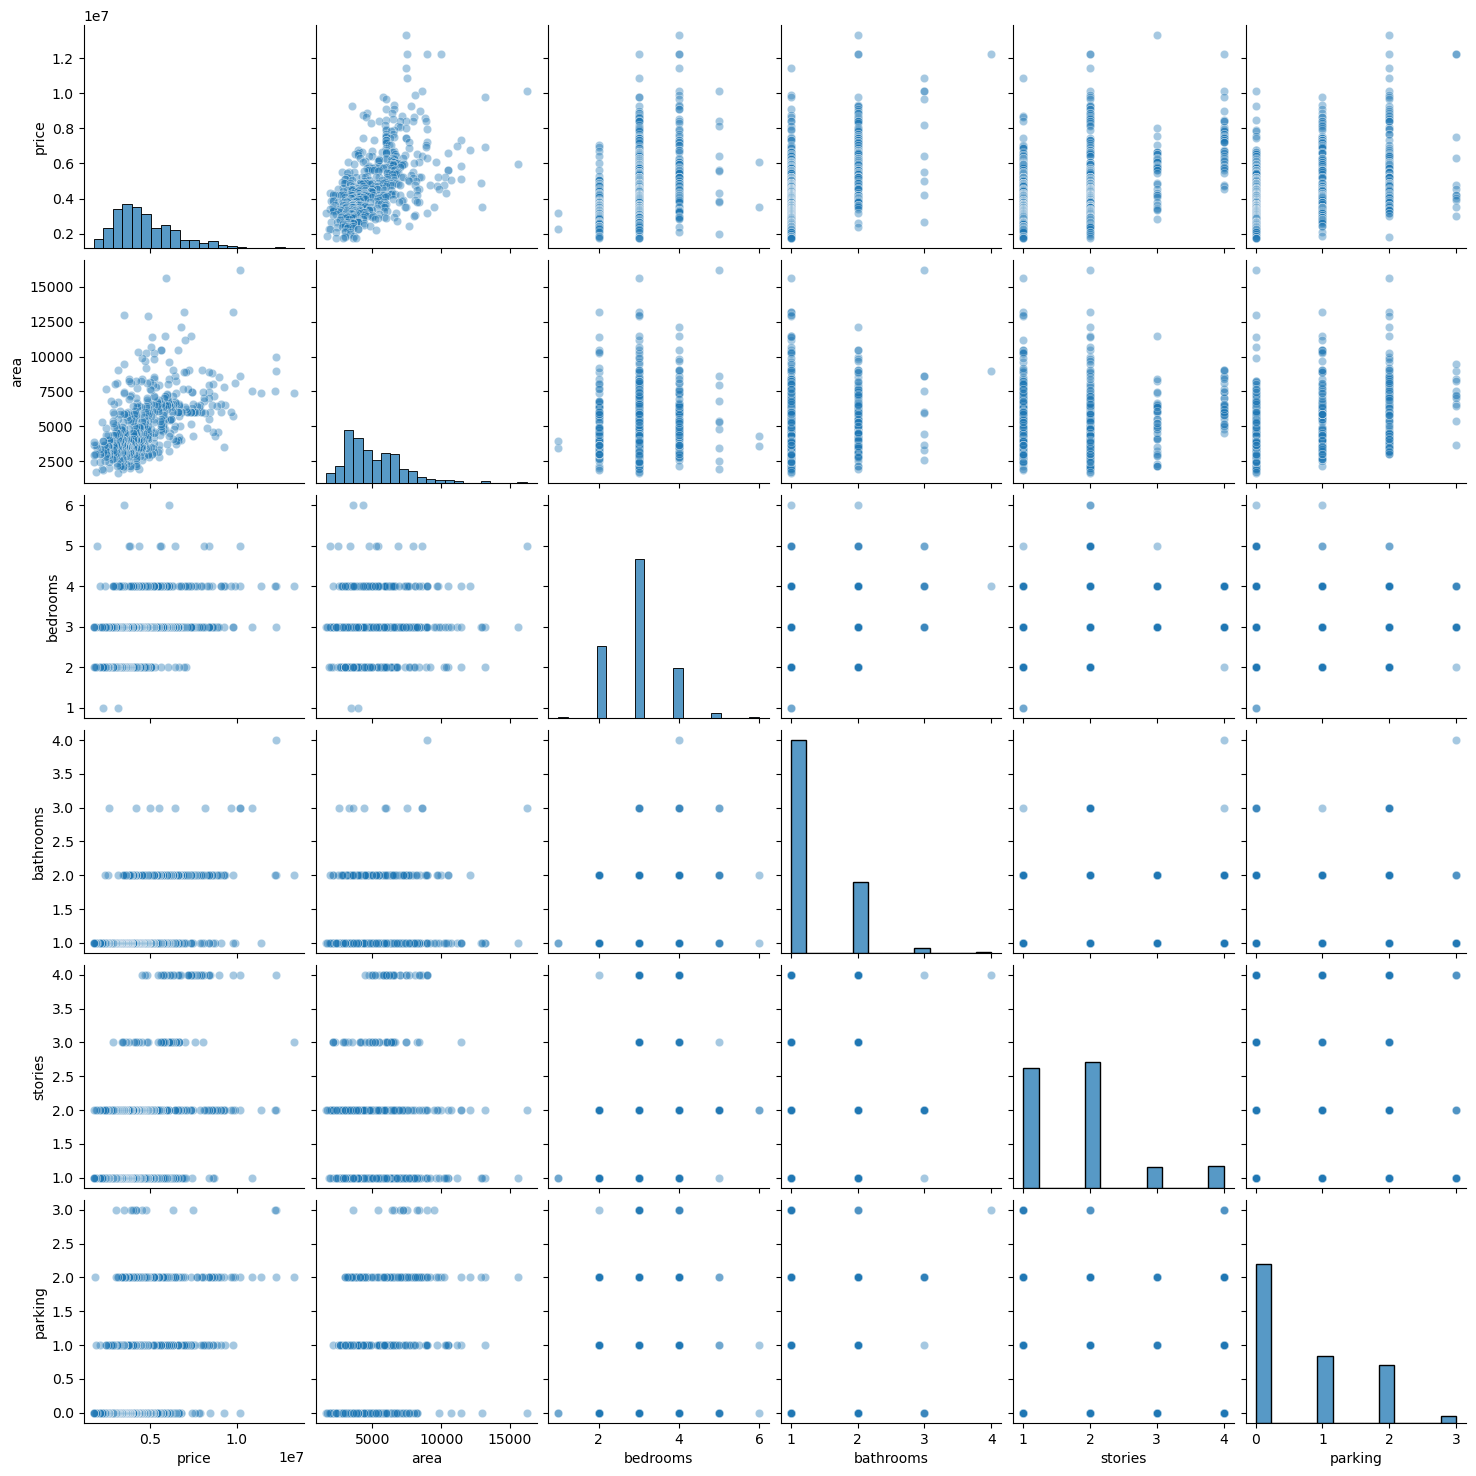

In [6]:
# FIND RELATIONSHIPS BETWEEN NUMERICAL VARIABLES
sns.pairplot(df, kind = "scatter", plot_kws = {"alpha": 0.4})
plt.show()

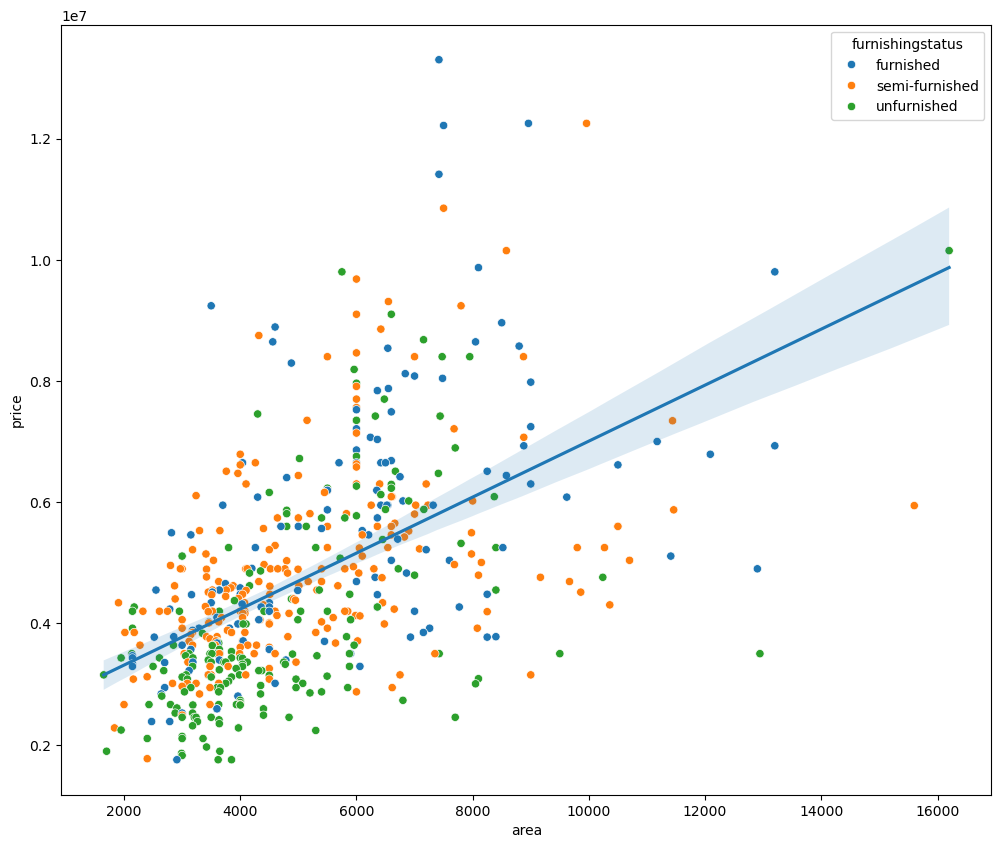

In [7]:
# SCATTERPLOT & REGRESSION PLOT FOR PRICE ACCORDING TO AREA, WHETHER THE HOUSES ARE FURNISHED
plt.figure(figsize=(12, 10))
sns.scatterplot(x = "area", y = "price", data = df, hue = "furnishingstatus")
sns.regplot(x = "area", y = "price", data = df, scatter = False)
plt.show()

## Closer Look On Outliers

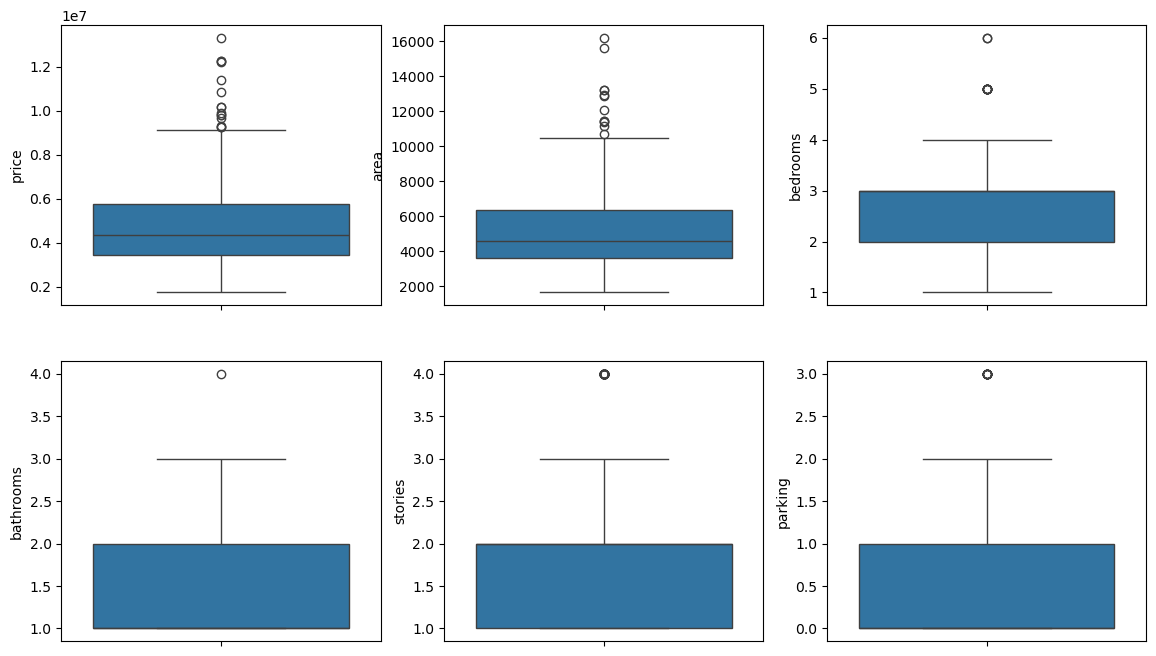

In [8]:
# BOXPLOTS OF OUTLIERS
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (14,8))
sns.boxplot(df["price"], ax = axs[0, 0])
sns.boxplot(df["area"], ax = axs[0, 1])
sns.boxplot(df["bedrooms"], ax = axs[0, 2])
sns.boxplot(df["bathrooms"], ax = axs[1, 0])
sns.boxplot(df["stories"], ax = axs[1, 1])
sns.boxplot(df["parking"], ax = axs[1, 2])
plt.show()

## Handling Outliers Using IQR Method
### Since outliers are not significant regarding house price prediction, we can remove them from the dataset in order for better precision

In [9]:
# HANDLING OUTLIERS OF PRICE
qt1_price = np.percentile(df["price"], 25)
qt2_price = np.percentile(df["price"], 75)
iqr_for_price = qt2_price - qt1_price
lowerbound_price = qt1_price - 1.5*iqr_for_price
upperbound_price = qt2_price + 1.5*iqr_for_price
data = df[(df["price"] >= lowerbound_price) & (df["price"] <= upperbound_price)]

In [10]:
# HANDLING OUTLIERS OF AREA
qt1_area = np.percentile(data["area"], 25)
qt2_area = np.percentile(data["area"], 75)
iqr_for_area = qt2_area - qt1_area
lowerbound_area = qt1_area - 1.5*iqr_for_area
upperbound_area = qt2_area + 1.5*iqr_for_area
data = data[(data["area"] >= lowerbound_area) & (data["area"] <= upperbound_area)]

In [11]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


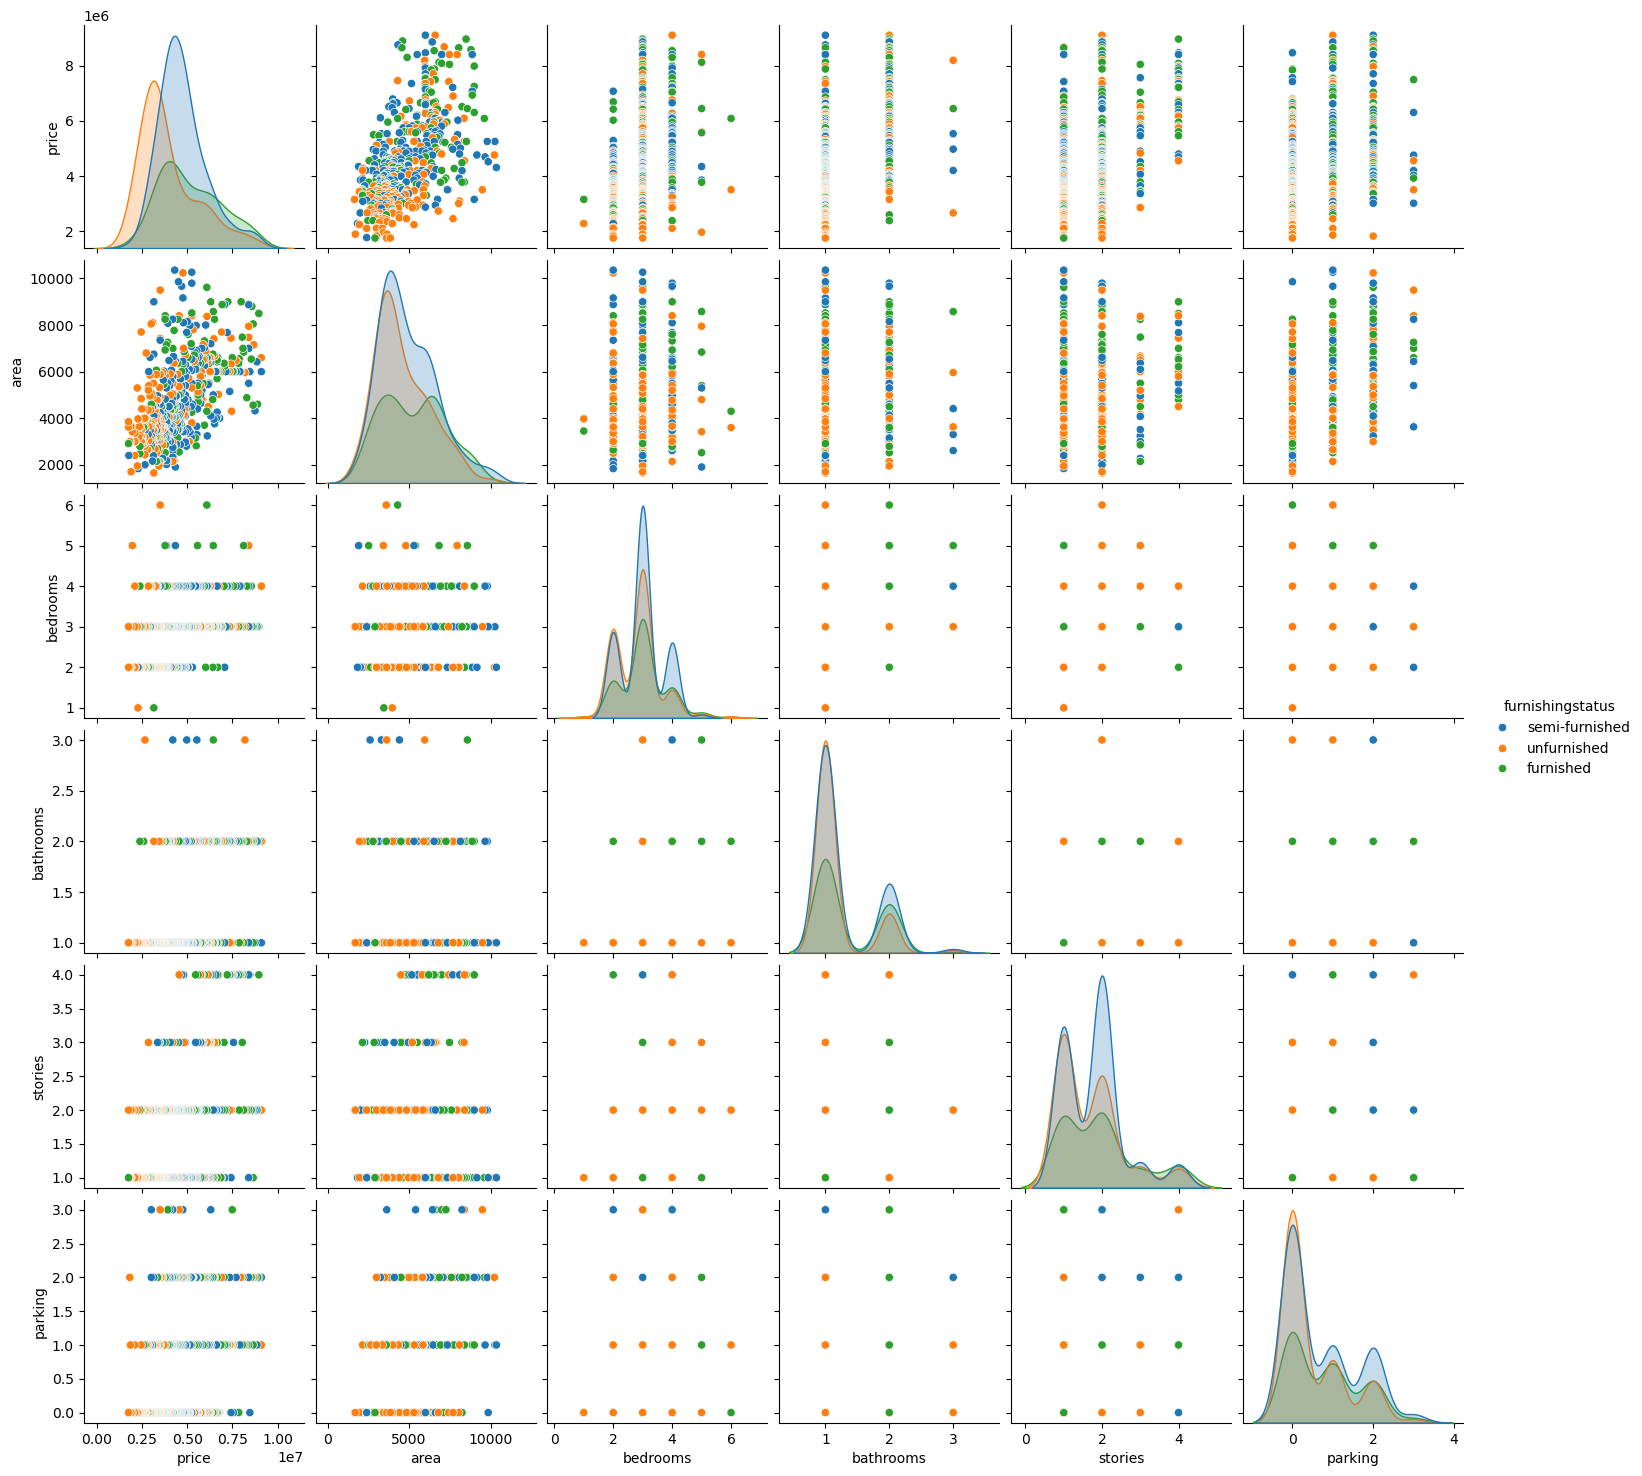

In [12]:
# VISUALIZING THE NEW DATA
sns.pairplot(data, hue = "furnishingstatus")
plt.show()

In [13]:
# CATEGORICAL AND NUMERICAL DATASET SEPERATION
categorical_data = data.select_dtypes(exclude = "int")
categorical_data.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
# CHECKING ON THE CATEGORICAL VALUES
cat_columns = categorical_data.columns

for col in cat_columns:
    print(f"\nValue counts for '{col}': ")
    print(data[col].value_counts())


Value counts for 'mainroad': 
mainroad
yes    440
no      77
Name: count, dtype: int64

Value counts for 'guestroom': 
guestroom
no     425
yes     92
Name: count, dtype: int64

Value counts for 'basement': 
basement
no     338
yes    179
Name: count, dtype: int64

Value counts for 'hotwaterheating': 
hotwaterheating
no     495
yes     22
Name: count, dtype: int64

Value counts for 'airconditioning': 
airconditioning
no     358
yes    159
Name: count, dtype: int64

Value counts for 'prefarea': 
prefarea
no     405
yes    112
Name: count, dtype: int64

Value counts for 'furnishingstatus': 
furnishingstatus
semi-furnished    215
unfurnished       175
furnished         127
Name: count, dtype: int64


<Axes: >

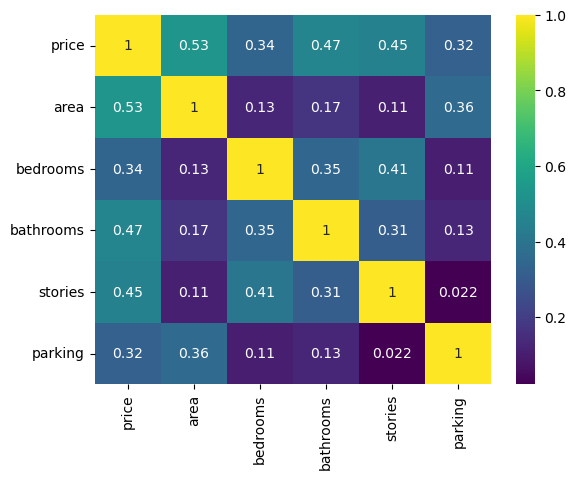

In [15]:
# CORRELATION BETWEEN NUMERICAL VARIABLES
numerical_data = data.drop(cat_columns, axis = 1)
corr = numerical_data.corr()
sns.heatmap(corr, annot = True, cmap = "viridis")

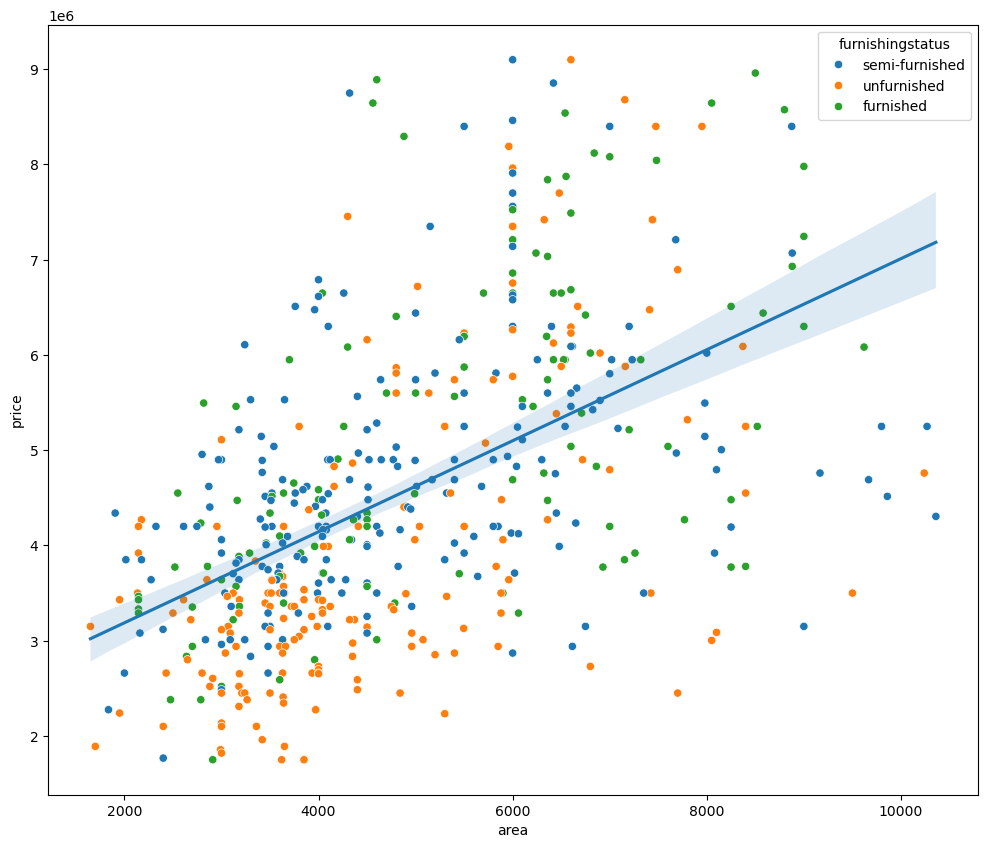

In [16]:
# SCATTER PLOT FOLLOWING THE REMOVAL OF OUTLIERS
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "area", y = "price", data = data, hue = "furnishingstatus")
sns.regplot(x = "area", y = "price", data = data, scatter = False)
plt.show()

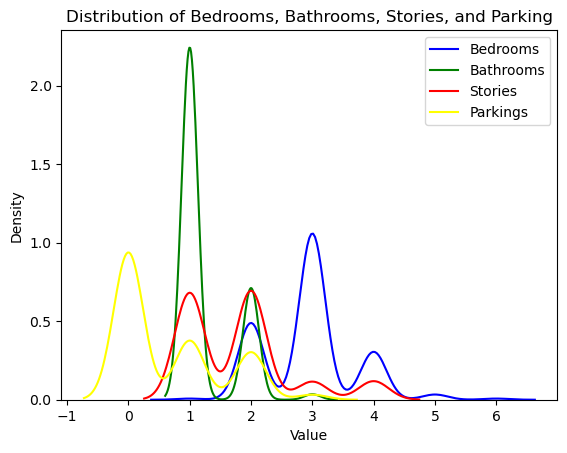

In [17]:
# DISTRIBUTION OF BEDROOMS, BATHROOMS, STORIES AND PARKING
sns.kdeplot(data['bedrooms'], color = 'blue', label = 'Bedrooms')
sns.kdeplot(data['bathrooms'], color = 'green', label = 'Bathrooms')
sns.kdeplot(data['stories'], color = 'red', label = 'Stories')
sns.kdeplot(data['parking'], color = 'yellow', label = 'Parkings')

plt.xlabel("Value")  # Generic label for x-axis
plt.ylabel("Density")
plt.title("Distribution of Bedrooms, Bathrooms, Stories, and Parking")
plt.legend()
plt.show()

## Preparation For Training

In [18]:
# IMPORTING NECCESSARY LIBRARIES FOR MODEL TRAINING AND EVALUATION
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pylab
import scipy.stats as stats

In [19]:
# CREATING DUMMY VARIABLES FOR CATEGORICAL COLUMNS
dummy = pd.get_dummies(data[cat_columns], drop_first = True)
dummy = dummy.astype("int")

In [20]:
# REPLACING THE PREVIOUS CAT_COLUMNS WITH DUMMY VARIABLES
data = data.drop(columns = cat_columns, axis = 1)
final_df = pd.concat([data, dummy], axis = 1)
final_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [21]:
# RESETTING FINAL_DF INDEX
final_df.reset_index(drop = True, inplace = True)
final_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
1,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
2,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
3,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
4,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
513,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
514,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
515,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [22]:
# SPLITTING THE DATA IN TO FEATURES AND TARGET
X = final_df.drop("price", axis = 1)
y = final_df["price"]

In [23]:
# SCALING THE DATA
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

## TRAINING

In [24]:
# SPLIT DATASET INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (361, 13)
X_test:  (156, 13)
y_train:  (361,)
y_test:  (156,)


In [26]:
# TRAIN THE LINEAR REGRESSION MODEL
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## EVALUATION

In [27]:
predictions = lr_model.predict(X_test)

In [28]:
pred_df = pd.DataFrame({"Dự đoán": predictions})
print(pred_df)

          Dự đoán
0    6.181403e+06
1    3.705548e+06
2    3.256206e+06
3    4.500573e+06
4    4.208703e+06
..            ...
151  4.418840e+06
152  5.258256e+06
153  4.280282e+06
154  3.834320e+06
155  5.014496e+06

[156 rows x 1 columns]


In [29]:
score = lr_model.score(X_test, y_test)
score

0.7101226832065198

In [30]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nMean Squared Error: {mse}"
f"\nMean Absolute Error: {mae}"
f"\nR2_Score: {r2}")


Mean Squared Error: 855741101679.984
Mean Absolute Error: 692612.9700301248
R2_Score: 0.7101226832065198


In [31]:
lr_model.coef_

array([ 418430.00881101,   76249.50973623,  331384.54889884,
        372937.62666757,  203501.53054834,  136182.26456296,
        166899.12351376,  152704.11103346,  126027.33049306,
        387337.31900411,  200061.76759834,   -3891.07494683,
       -122595.92693967])

In [32]:
coef_df = pd.DataFrame(lr_model.coef_, columns=["Coef"])
coef_df.index = final_df.drop("price", axis=1).columns
print(coef_df)

                                          Coef
area                             418430.008811
bedrooms                          76249.509736
bathrooms                        331384.548899
stories                          372937.626668
parking                          203501.530548
mainroad_yes                     136182.264563
guestroom_yes                    166899.123514
basement_yes                     152704.111033
hotwaterheating_yes              126027.330493
airconditioning_yes              387337.319004
prefarea_yes                     200061.767598
furnishingstatus_semi-furnished   -3891.074947
furnishingstatus_unfurnished    -122595.926940


Text(0.5, 1.0, 'Evaluation of our LR Model')

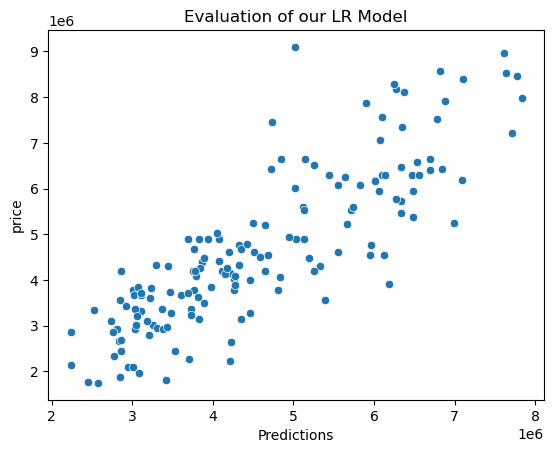

In [33]:
# COMPARING THE PREDICTIONS WITH THE ACTUAL VALUES
# ĐỐI CHIẾU
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LR Model")

In [34]:
residuals = y_test - predictions
residuals

304   -2.261403e+06
501   -1.430548e+06
441   -2.462056e+05
153    7.424268e+05
503   -1.975703e+06
           ...     
192    3.761598e+05
66     1.251744e+06
286   -1.852821e+05
422   -6.843201e+05
94     1.005504e+06
Name: price, Length: 156, dtype: float64

Text(0.5, 1.0, 'Residual Analysis')

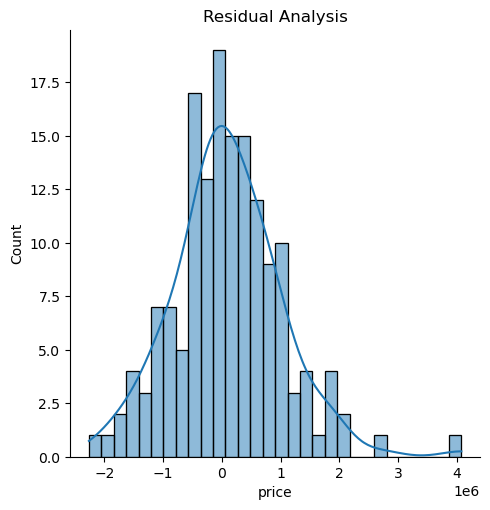

In [35]:
# BIỂU ĐỒ PHÂN TÍCH PHẦN DƯ (RESIDUAL ANALYSIS)
sns.displot(residuals, bins = 30, kde = True)
plt.title("Residual Analysis")

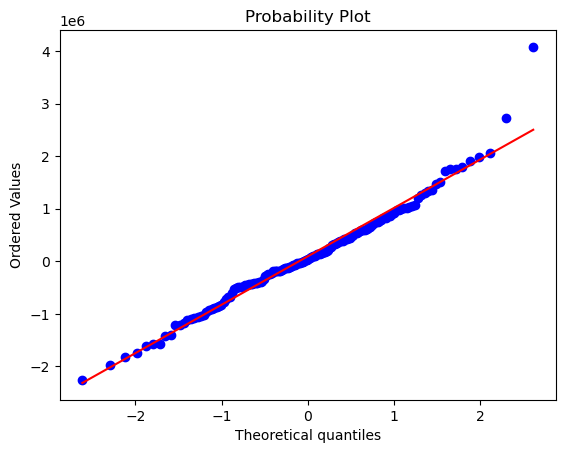

In [36]:
# KIỂM TRA PHÂN PHỐI PHẦN DƯ (RESIDUAL DISTRIBUTION)
stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()